In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("bill_authentication.csv")
df.shape

(1372, 5)

In [31]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


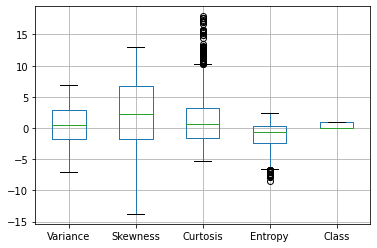

In [32]:
df.boxplot()
plt.show()

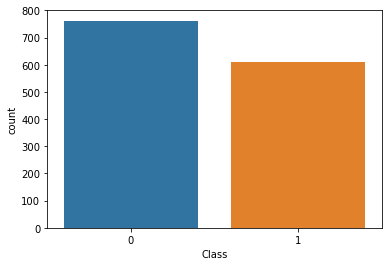

In [33]:
import seaborn as sns
sns.countplot(x = 'Class', data = df);

In [34]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [35]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [36]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [37]:
print('X is:\n', x.head(2))
print('\nY is:\n', y.head(2))

X is:
    Variance  Skewness  Curtosis  Entropy
0    3.6216    8.6661   -2.8073 -0.44699
1    4.5459    8.1674   -2.4586 -1.46210

Y is:
 0    0
1    0
Name: Class, dtype: int64


In [38]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

In [41]:
print('X Train is:\n', x_train.head(2))
print('\nY Train is:\n', y_train.head(2))
print('\nX Test is:\n', x_test.head(2))
print('\nY Test is:\n', y_test.head(2))

X Train is:
      Variance  Skewness  Curtosis  Entropy
329    1.6988    2.9094    2.9044  0.11033
442    3.3590    9.8022   -3.8209 -3.71330

Y Train is:
 329    0
442    0
Name: Class, dtype: int64

X Test is:
     Variance  Skewness  Curtosis  Entropy
7     2.0922   -6.8100    8.4636 -0.60216
31    1.4884    3.6274    3.3080  0.48921

Y Test is:
 7     0
31    0
Name: Class, dtype: int64


In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

In [43]:
model = clf.fit(x_train, y_train)

In [44]:
y_pred = model.predict(x_test)
y_pred[:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [45]:
# Comparing Actual Vs Predicted Data

comp = pd.DataFrame({"Actual": y_test, "Predicted":y_pred})
comp

,Actual,Predicted
7,0,0
31,0,0
979,1,1
514,0,0
795,1,1
...,...,...
617,0,0
60,0,0
822,1,1
326,0,1


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix is:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix is:
 [[151   1]
 [  0 123]]


In [47]:
271 / 275

0.9854545454545455

In [48]:
print('Classification Report\n', classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       123

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [49]:
# Log Reg
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [23]:
model = logreg.fit(x_train, y_train)

In [24]:
y_pred = model.predict(x_test)
y_pred[:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix is:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix is:
 [[151   1]
 [  1 122]]


In [25]:
print('Classification Report\n', classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.99      0.99      0.99       123

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

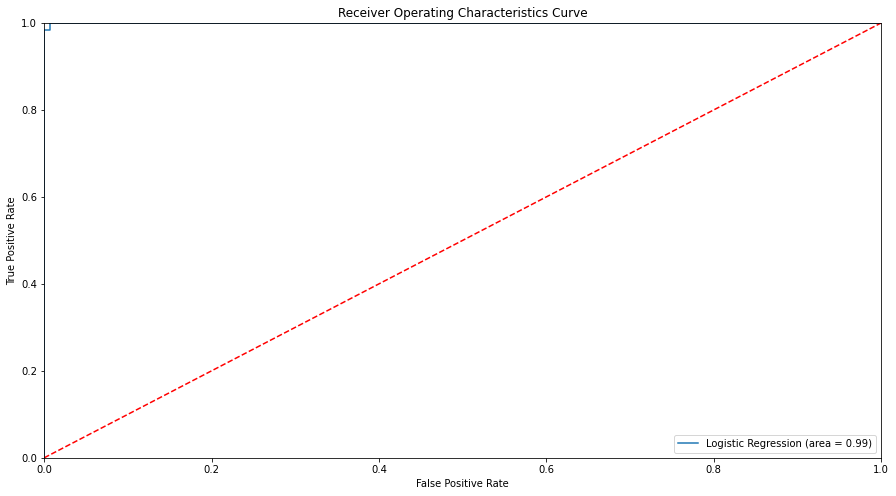

In [28]:
roc_score = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()